# Step 1: Reading and Analyzing the dataset

In [1]:
# Importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Setting up the visualization theme
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Loading the dataset into customer_df
file_path = "files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv"
customer_df = pd.read_csv(file_path)

# Displaying the head, shape, and info of the dataset
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
customer_df.shape

(9134, 24)

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Statistics :
    * Customer Lifetime Value: Mean = $8004.94, with a wide range (Min = $1898.01, Max = $83325.38), indicating variability in customer value.
    
    *  Income: Average income is $37657.38, but with significant diversity (Min = $0, Max = $99981), reflecting a broad      customer base.
    
    * Monthly Premium Auto: Averages at $93.22, ranging from $61 to $298, showing different levels of coverage and policy    costs.
    
    * Total Claim Amount: Mean = $434.09, Min = $0.1, Max = $2893.24, which might be correlated with the coverage types and premiums.
    
    * Months Since Last Claim and Months Since Policy Inception: Show a distribution of customer engagement and policy       duration.

In [4]:
# Renaming columns to follow the PE8 (snake case)
customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

# Display the new column names to confirm the change
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [5]:
# Changing the 'effective_to_date' column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Confirming the change by displaying the datatype of each column
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### Correlation Matrix :

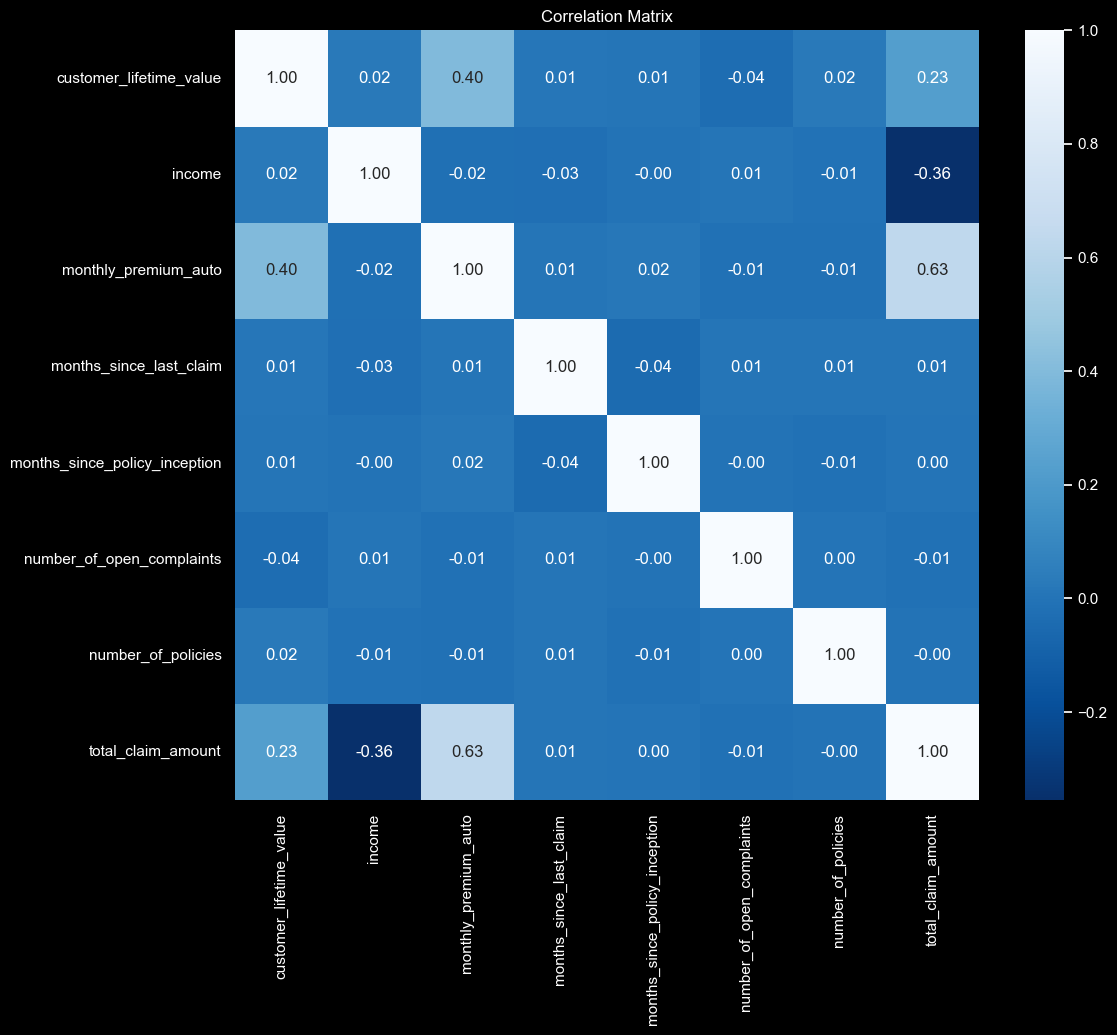

In [6]:
# Setting up the dark theme for the plot
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Calculating the correlation matrix for numerical columns
correlation_matrix = customer_df.select_dtypes(include=['int64', 'float64']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

##### Key points from the plot :
    * Customer Lifetime Value & Monthly Premium Auto: A moderate positive correlation (0.40), indicating as customerlifetime value increases, so does the monthly premium auto. This suggests that customers who are valued higher potentially buy more premium policies.
    
    * Total Claim Amount & Monthly Premium Auto: A strong positive correlation (0.63), which is logical since higher  premiums often lead to higher claim amounts, possibly reflecting higher coverage.
    
    * Months Since Policy Inception & Months Since Last Claim: A very low positive correlation (0.005), implying almost no  direct relationship between the length of the policy and the time since the last claim.

### Continuous Variables Plotting :

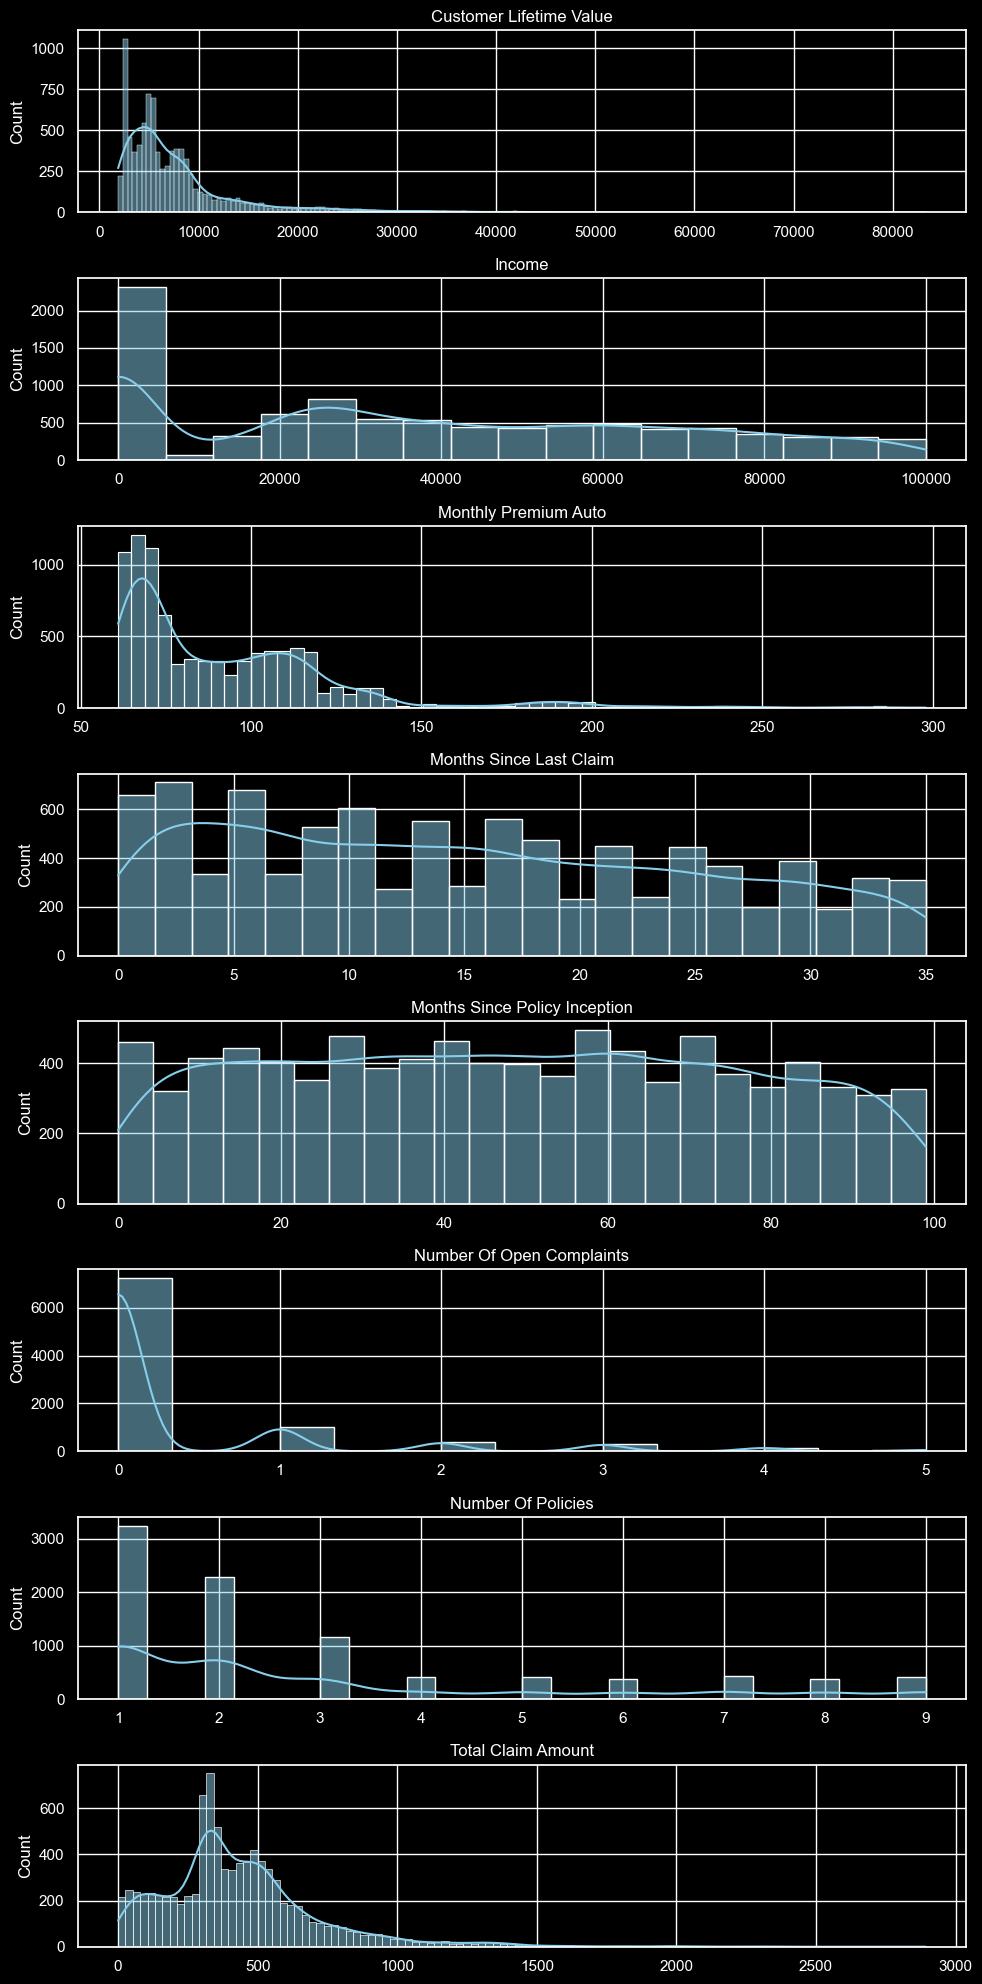

In [7]:

# Identifying continuous variables for plotting
continuous_vars = customer_df.select_dtypes(include=['float64', 'int64']).columns

# Plotting each continuous variable using histograms
fig, axes = plt.subplots(nrows=len(continuous_vars), ncols=1, figsize=(10, 20))

for i, var in enumerate(continuous_vars):
    sns.histplot(customer_df[var], ax=axes[i], kde=True, color="skyblue")
    axes[i].set_title(var.replace('_', ' ').title())
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

###### Key points from the plots :
    * Customer Lifetime Value: Shows a right-skewed distribution, indicating a larger number of customers with lower        lifetime values and a few with very high values. This suggests most customers are in the lower end of the value          spectrum, with outliers potentially representing highly valuable customers.
    
    * Income: The distribution is bimodal, with a significant peak at the lower end, likely representing unemployed or       low-income customers, and another broader distribution across higher income values. This reflects a diverse customer     base in terms of economic status.

    * Monthly Premium Auto: Also right-skewed, similar to customer lifetime value, indicating most customers pay lower      premiums, with fewer customers opting for or requiring more expensive coverage.

    * Months Since Last Claim and Months Since Policy Inception: These show a more uniform distribution, indicating claims  and policy durations are spread out over time without significant clustering at specific periods.

    * Number of Open Complaints: Heavily skewed towards zero, showing that most customers have few to no complaints, which  could indicate overall satisfaction or a non-confrontational customer base.

    * Number of Policies: Shows a declining trend as the number of policies increases, indicating most customers hold fewer policies, with diminishing numbers holding multiple policies.

    * Total Claim Amount: Right-skewed like the premium and lifetime value distributions, showing many small claims and        fewer large claims, typical of general insurance claim distributions.

### Categorical Variables Plotting :

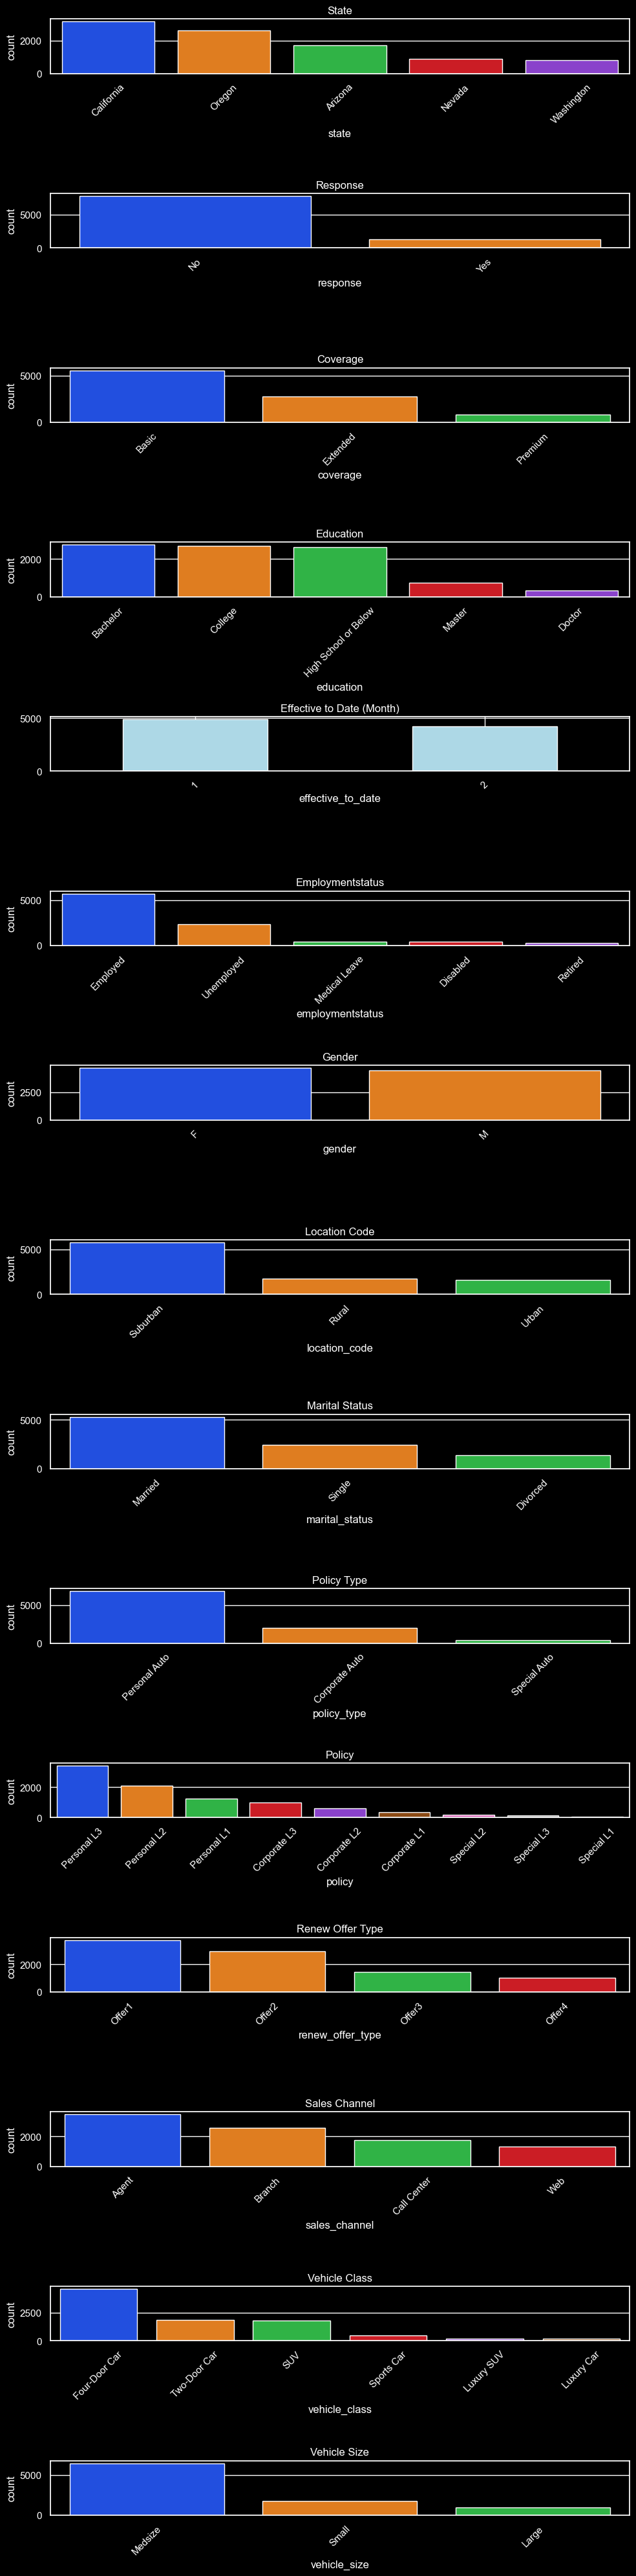

In [8]:
# Dropping the 'customer' column as it's a unique identifier for each row and not useful for categorical analysis
customer_df = customer_df.drop('customer', axis=1)

# Identifying categorical variables for plotting
categorical_vars = customer_df.select_dtypes(include=['object', 'datetime64[ns]']).columns

# Setting up plots for categorical variables using bar plots
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(10, 40))

for i, var in enumerate(categorical_vars):
    if var == 'effective_to_date':
        # For the date, we plot the count of entries per month to keep it categorical in nature
        customer_df[var].dt.month.value_counts().sort_index().plot(kind='bar', ax=axes[i], color='lightblue')
        axes[i].set_title('Effective to Date (Month)')
    else:
        order = customer_df[var].value_counts().index
        sns.countplot(data=customer_df, x=var, ax=axes[i], order=order, palette='bright')
        axes[i].set_title(var.replace('_', ' ').title())
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

###### Key points from the plots :
    * State: Shows that California has the highest number of customers, indicating a stronger market presence or preference for this insurance company in that state.

    * Response: A significant majority of customers did not respond to the marketing efforts, suggesting a need for            re-evaluating the approach to increase engagement.

    * Coverage: Basic coverage is the most common, followed by extended and then premium, reflecting customer preference for cost-effective insurance options.

    * Education: The distribution across education levels is relatively balanced, with Bachelor being slightly more            prevalent. This suggests the customer base is well-distributed across different educational backgrounds.

    * EmploymentStatus: Employed individuals constitute the majority of the customer base, which could correlate with       the ability to afford insurance. The unemployed and other categories indicate diversity in the customer employment           status.

    * Gender: The distribution between male and female customers is almost even, indicating no significant bias in policy    ownership by gender.

    * Location Code: Suburban locations have the highest number of customers, which could be due to demographic             distributions or preferences in those areas.

    * Marital Status: Married individuals are the largest group, potentially indicating a tendency for married couples to   secure insurance.

    * Policy Type and Policy: Personal Auto is the most common policy type, with Personal L3 being the most common policy.  This shows a preference or need for personal vehicle insurance among the customers.

    * Renew Offer Type: Offer1 appears to be the most accepted or selected offer, suggesting it might be the most attractive in terms of benefits or costs.

    * Sales Channel: The agent channel is the most popular for sales, highlighting the importance of personal interaction in insurance sales.

    * Vehicle Class: Four-Door Car is the most insured vehicle class, likely due to its commonality. Luxury vehicles have   the fewest insurances, which could reflect their lower population or higher insurance costs.

    * Vehicle Size: Medium-sized vehicles are the most common among the insured, suggesting a preference or prevalence of this size in the customer vehicle portfolio.

In [9]:
# Why deleting the customer column : The customer column is unique for each row (customer ID) and does not provide any meaningful comparison or aggregation for analysis.
# Including it in categorical analysis would result in a plot with as many categories as there are entries, which is not useful.

### Continous Variables Outliers :

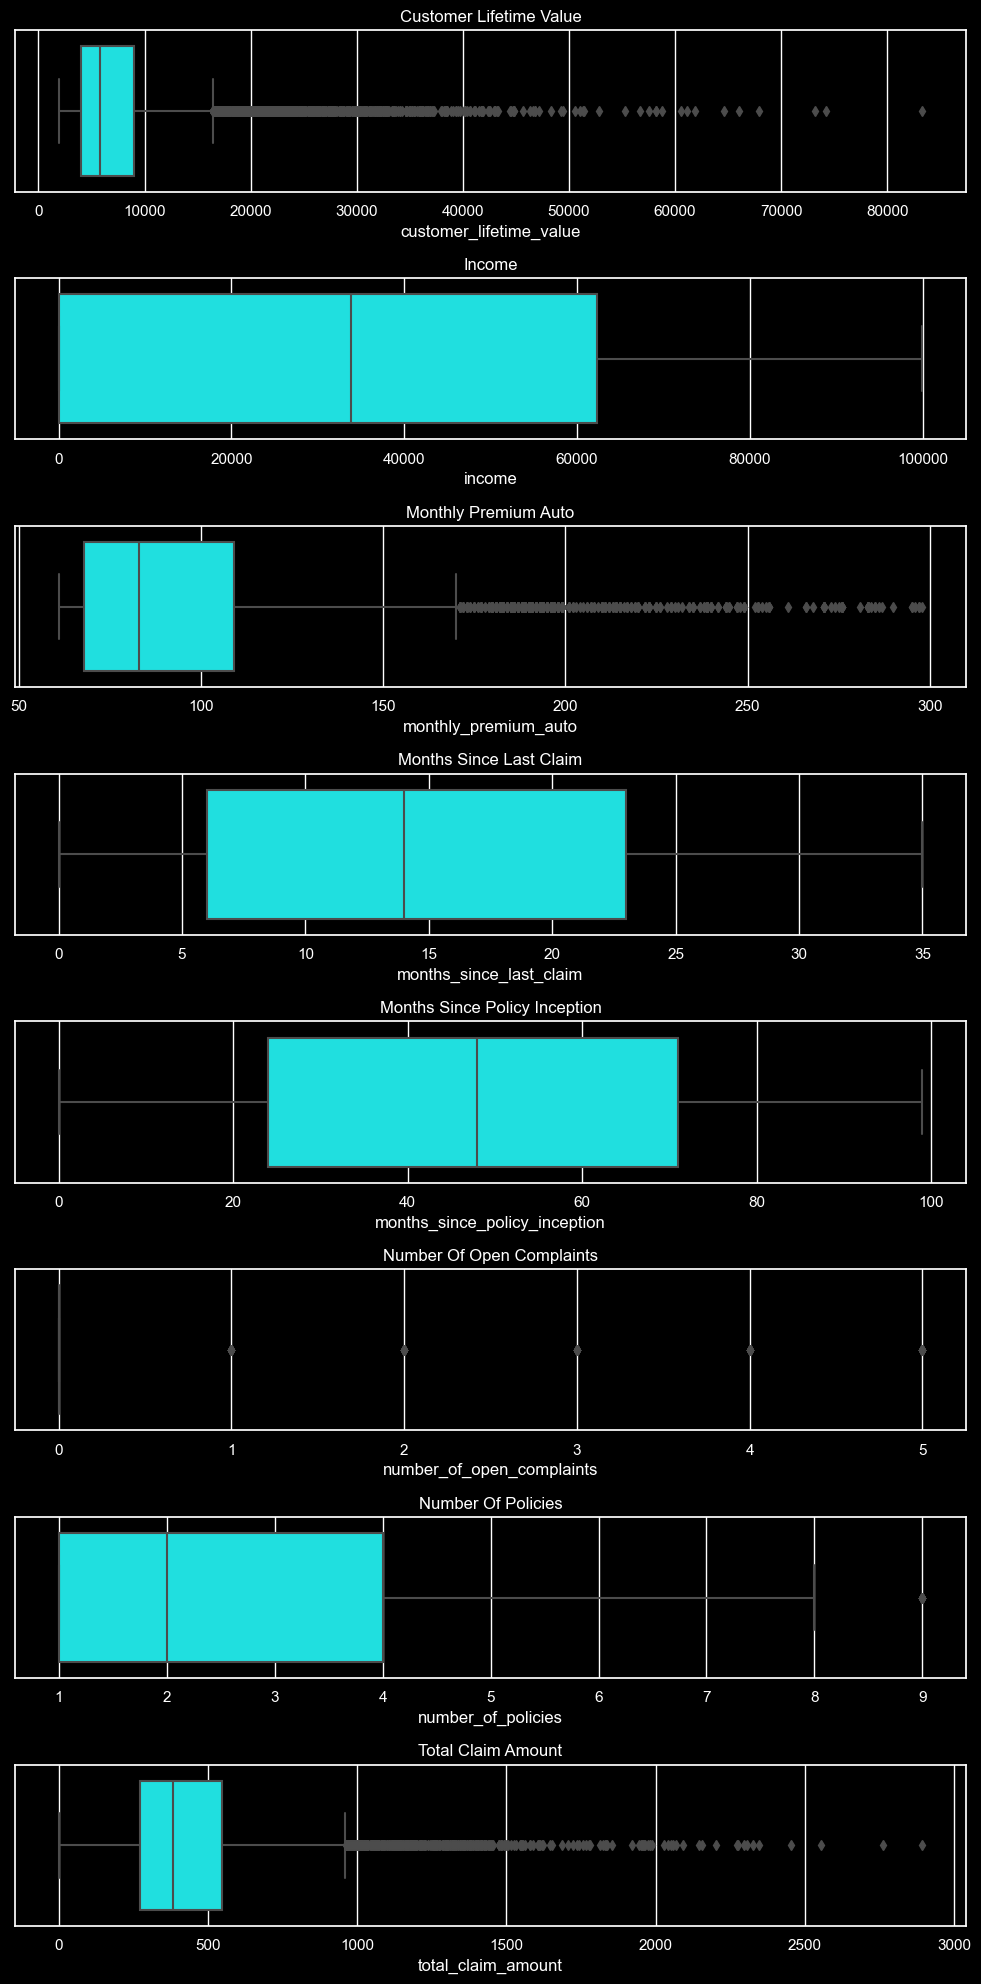

In [10]:
# Identifying continuous variables again (since 'customer' column has been dropped)
continuous_vars = customer_df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for continuous variables to identify outliers
fig, axes = plt.subplots(nrows=len(continuous_vars), ncols=1, figsize=(10, 20))

for i, var in enumerate(continuous_vars):
    sns.boxplot(x=customer_df[var], ax=axes[i], color="cyan")
    axes[i].set_title(var.replace('_', ' ').title())

plt.tight_layout()
plt.show()

###### Observations on outliers from the boxplots:
    * Customer Lifetime Value: Shows significant outliers beyond the upper whisker, suggesting some customers have much      higher lifetime values compared to the majority. These could be high-value customers or errors in data entry.

    * Income: No outliers are identified, which is expected since income distribution ranges uniformly from low to high.

    * Monthly Premium Auto: Identifies numerous outliers on the higher end, indicating some policies have much higher          premiums. These could be due to higher coverage amounts, luxury vehicles, or other risk factors.

    * Months Since Last Claim and Months Since Policy Inception: Do not show significant outliers, as these are time-related and follow expected ranges.

    * Number of Open Complaints: Shows outliers, but given the nature of this variable, outliers represent customers with a high number of complaints, which could be areas of concern for customer service.

    * Number of Policies: Similar to complaints, outliers indicate customers holding many policies. This might not be          problematic unless the high number correlates with other risk factors or issues.

    * Total Claim Amount: Exhibits outliers on the higher end, suggesting some claims are much larger than the average.            These could be due to significant accidents, high-value vehicles, or comprehensive coverage.

###  What to do with these outliers:

    * Analytical Approach: Outliers in customer lifetime value, monthly premium auto, and total claim amount warrant further investigation. They could indicate high-value customers or specific segments requiring tailored services. Removing these outliers without analysis might lead to loss of valuable insights.
    
    * Data Cleaning: For data modeling purposes, especially in predictive models, outliers might need to be handled through transformation, capping, or removal to improve model accuracy and generalization.
    
    * Business Strategy: Identifying the reasons behind these outliers (e.g., luxury vehicle insurance leading to high premiums and claim amounts) could inform targeted strategies for product offerings and customer engagement.

In [11]:
# Checking for NaN values in all columns
nan_values = customer_df.isna().sum()

# Deciding what to do with NaN values based on the summary
nan_values_decision = "No action needed" if nan_values.sum() == 0 else "Further investigation required"

nan_values, nan_values_decision

(state                            0
 customer_lifetime_value          0
 response                         0
 coverage                         0
 education                        0
 effective_to_date                0
 employmentstatus                 0
 gender                           0
 income                           0
 location_code                    0
 marital_status                   0
 monthly_premium_auto             0
 months_since_last_claim          0
 months_since_policy_inception    0
 number_of_open_complaints        0
 number_of_policies               0
 policy_type                      0
 policy                           0
 renew_offer_type                 0
 sales_channel                    0
 total_claim_amount               0
 vehicle_class                    0
 vehicle_size                     0
 dtype: int64,
 'No action needed')

All columns are free from NaN values, indicating complete data across all entries.

No action is required regarding missing data, allowing for straightforward analysis and modeling without the need for imputation or removal of missing values.